# problem statement

Data Info:
* Data Set Characteristics: Multivariate 
* Number of Instances: more than 1500 
* Area: Medical/electronics 
* Attribute Characteristics: Real 
* Number of Attributes: more than 550 
* Associated Tasks: Classification, Causal-Discovery 

objective: 
* To save the manufacturing time, cost, need to Reduce the number of testing points (currently it is more than 550, 
Target to reduce it at-least 100.) 
* Important: - After reduction of Testing points 550 to 100, the assembly line will be redesign to save money without 
significant compromise in quality.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',200)

In [2]:
data=pd.read_csv(r"C:\Users\Vivek H M\Downloads\23-02-2023\ML Project by Mithilesh\Feb_16th_USG_Manufacturing\Ultrasound_1.csv")
df=data.copy()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,...,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,NaN,NaN,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,NaN,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,NaN,NaN,NaN,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,NaN,NaN,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,NaN,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.6203,0.0,4.9219,29.4107,NaN,NaN,0.0,0.0371,0.0337,0.0335,0.0422,0.0317,0.0501,0.0231,0.0498,1.5485,0.0009,NaN,0.0132,0.0002,18.7764,0.0193,457.4320,0.0,0.0074,0.0053,0.0036,0.0072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0016,0.0013,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0255,0.0068,0.0,43.9254,0.0004,0.8653,0.0087,0.0013,0.1253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0262,2.7696,0.8687,6.0503,4.1663,6.4137,2.9181,45.1098,10

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 577 entries, 0 to Pass/Fail
dtypes: float64(576), int64(1)
memory usage: 6.9 MB


In [4]:
df.shape

(1577, 577)

In [5]:
df['Pass/Fail'].value_counts()

-1    1472
 1     105
Name: Pass/Fail, dtype: int64

In [6]:
df['Pass/Fail'].value_counts(normalize=True)*100

-1    93.341788
 1     6.658212
Name: Pass/Fail, dtype: float64

In [7]:
df.isnull().sum().sum()

42093

In [8]:
df.isnull().sum()/len(df)*100

0            0.317058
1            0.443881
2            0.887762
3            0.887762
4            0.887762
               ...   
586          0.000000
587          0.000000
588          0.000000
589          0.000000
Pass/Fail    0.000000
Length: 577, dtype: float64

In [406]:
(df.isnull().sum()/len(df)*100).head(20)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
dtype: float64

In [10]:
# Dropping the columns having high missing values
high_null=df.isnull().sum()/len(df)*100
high_missing=high_null[high_null>=60].index
high_missing.shape

(24,)

In [11]:
df.drop(high_missing,axis=1,inplace=True)

In [12]:
df.isnull().sum().sum()

14789

In [13]:
df.shape

(1577, 553)

In [14]:
df.fillna(df.median(),inplace=True)
df.isnull().sum().sum()

0

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,...,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,152.2741,466.0736,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,...,0.0,0.0,0.0729,2.4717,5.0729,0.0910,1.1107,6.4306,2.4717,3.5393,7.3148,0.1352,2.6203,0.0,4.9219,29.4107,5.5563,3.04535,0.0,0.0371,0.0337,0.0335,0.0422,0.0317,0.0501,0.0231,0.0498,1.5485,0.0009,0.0132,0.0002,18.7764,0.0193,457.4320,0.0,0.0074,0.0053,0.0036,0.0072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0016,0.0013,0.0,0.0,0.0,0.0,0.0255,0.0068,0.0,43.9254,0.0004,0.8653,0.0087,0.0013,0.1253

In [16]:
# converting columnn pass/fail to 0 and 1
df['Pass/Fail']=df['Pass/Fail'].replace(-1,0)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,...,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,152.2741,466.0736,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,...,0.0,0.0,0.0729,2.4717,5.0729,0.0910,1.1107,6.4306,2.4717,3.5393,7.3148,0.1352,2.6203,0.0,4.9219,29.4107,5.5563,3.04535,0.0,0.0371,0.0337,0.0335,0.0422,0.0317,0.0501,0.0231,0.0498,1.5485,0.0009,0.0132,0.0002,18.7764,0.0193,457.4320,0.0,0.0074,0.0053,0.0036,0.0072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0016,0.0013,0.0,0.0,0.0,0.0,0.0255,0.0068,0.0,43.9254,0.0004,0.8653,0.0087,0.0013,0.1253

In [17]:
df['Pass/Fail'].value_counts()

0    1472
1     105
Name: Pass/Fail, dtype: int64

In [18]:
df['Pass/Fail'].value_counts(normalize=True)

0    0.933418
1    0.066582
Name: Pass/Fail, dtype: float64

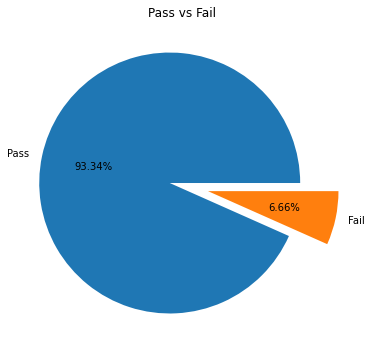

In [19]:
plt.figure(figsize=(6,6))
plt.pie(df['Pass/Fail'].value_counts(),labels=['Pass','Fail'],explode=[0.1,0.2],autopct='%1.2f%%')
plt.title('Pass vs Fail')
plt.show()

In [20]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,...,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.0,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.00000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.0,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.00000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.0,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.0,1577.0,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.0,1577.000000,1577.000000,1577.0

In [21]:
df1=df.copy()
one_unique=df1.nunique()
one_unique.head(10)

0    1489
1    1497
2     502
3     512
4     502
5       1
6     504
7      90
8    1199
9     566
dtype: int64

In [22]:
count_cols=one_unique[one_unique==1].index
print(count_cols)
print(count_cols.shape)

Index(['5', '42', '141', '178', '179', '186', '226', '229', '230', '231',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=104)
(104,)


In [23]:
df1.shape

(1577, 553)

In [24]:
df1.drop(count_cols,axis=1,inplace=True)


In [25]:
df1.shape

(1577, 449)

In [26]:
x=df1.drop(["Pass/Fail"],axis=1)
y=df1["Pass/Fail"]


# Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
x_scaled=scaled.fit_transform(x)

In [28]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
0,0.376148,0.291207,0.534140,0.286993,0.000482,0.419322,0.906716,0.565965,0.375682,0.393629,0.910747,0.179374,0.420461,0.142305,0.063498,0.968426,0.394952,0.832675,0.802338,0.110171,0.834530,0.507561,0.563973,0.719916,0.926150,0.688267,0.345946,0.871080,0.752191,0.963139,0.101468,0.067558,0.046687,0.017485,0.953313,0.387589,0.594883,0.287964,0.154878,0.130201,0.469617,0.404846,0.268338,0.256829,0.827583,0.586583,0.455458,0.799447,0.792060,0.787766,0.807407,0.922953,0.655914,0.836839,0.282867,0.660107,0.403305,0.147250,0.047738,0.159316,0.138941,0.499084,0.000094,0.807180,0.279826,0.233454,0.901490,0.042427,0.150713,0.557060,0.412284,0.527118,0.724225,0.834922,0.363985,0.644980,0.375770,0.737160,0.551757,0.987191,0.428383,0.067798,0.344100,0.367097,0.366093,0.549342,0.612903,0.666667,0.364648,0.675253,0.357926,0.566038,0.585366,0.643663,0.505639,0.642105,0.634804,0.449180,0.414997,0.349161,0.931423,0.762408,0.0,0.511563,0.983398,0.019918,0.710608,0.944915,0.677768,0.540984,0.371407,0.731183,0.552239,0.281215,0.254997,0.362440,0.915276,0.712089,0.588474,0.114173,0.530583,0.761944,0.104376,0.083333,0.338082,0.418700,0.363115,0.271621,0.000010,0.027939,0.355372,0.033901,0.255560,0.177176,0.016427,0.003514,0.523855,0.008894,0.000716,0.036974,0.012564,0.024662,0.011322,0.018611,0.134772,0.020768,0.004258,0.129572,0.044029,0.037432,0.113300,0.01875,0.033237,0.103102,0.746813,0.253762,0.380748,0.332678,0.380748,0.561233,0.334603,0.094975,0.138019,0.089368,0.075439,0.176100,0.034234,0.016468,0.010573,0.184789,0.031736,0.018410,0.030084,0.019543,0.002866,0.053001,0.071208,0.026252,0.033212,0.000041,0.020393,0.021184,0.592263,0.0,0.191950,0.249298,0.109370,0.073125,0.116815,0.263501,0.158184,0.132183,0.474657,0.166667,0.072684,0.000303,0.018010,0.040440,0.376431,0.166329,0.058709,0.121212,0.126126,0.220798,0.017831,0.0,0.115159,0.000909,0.000840,0.040470,0.033766,0.285875,0.363043,0.061824,0.116527,0.132289,0.314043,0.358720,0.396862,0.227066,0.000009,0.027207,0.264706,0.043331,0.186217,0.219697,0.016955,0.004219,0.501849,0.007375,0.000622,0.037992,0.015886,0.023203,0.012069,0.020176,0.123360,0.023212,0.003696,0.096884,0.032874,0.030624,0.106388,0.015070,0.040930,0.156611,0.682872,0.219259,0.376200,0.305245,0.376200,0.604412,0.301511,0.095973,0.158504,0.094554,0.079612,0.174379

In [29]:
corr_matrix=x_scaled.corr(method="spearman")
corr_matrix

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
0,1.000000,-0.174254,-0.004933,0.000871,-0.003782,-0.015269,0.002752,-0.066828,0.024701,-0.008397,0.065179,-0.000054,0.006828,-0.007177,-0.034343,0.043736,0.008633,-0.027135,0.024516,0.010032,0.001900,-0.047904,-0.022133,0.070766,0.055095,0.091101,0.040223,-0.040198,-0.042307,-0.027299,0.056066,-0.018182,0.039357,-0.037643,-0.039353,-0.038540,-0.031190,-0.056404,0.039747,-0.011484,-0.038381,0.056423,-0.015804,-0.028857,-0.027795,0.014282,-0.036898,-0.068498,-0.023963,0.011434,-0.027557,-0.003773,-0.030167,-0.013211,-0.074513,-0.027073,0.023119,-0.001130,-0.044893,-0.019305,-0.023269,-0.009466,-0.000528,0.040881,-0.011222,-0.024027,-0.002045,-0.016680,0.061513,0.021058,0.003397,0.055788,-0.100766,-0.016721,0.036341,0.039646,-0.010677,0.043705,-0.023369,0.014540,-0.034366,0.048896,-0.003109,0.019739,-0.006845,-0.010303,0.014877,-0.049546,-0.002423,-0.021163,-0.025367,0.059747,-0.022333,-0.054965,-0.078972,0.023286,0.004550,0.008228,-0.018723,-0.032654,-0.023985,-0.002403,0.024376,0.001793,0.043743,0.008008,-0.036906,-0.042784,0.017883,0.000703,0.016662,-0.008373,-0.017618,0.059767,-0.018446,0.007839,-0.023243,-0.064164,0.017075,-0.005099,0.027480,-0.003866,0.012588,-0.026684,0.166904,0.160508,-0.025013,0.005922,-0.034396,-0.014471,-0.021846,0.011390,-0.013585,-0.018779,-0.074336,-0.024916,0.010536,-0.019936,-0.023562,-0.049745,-0.024052,-0.060054,0.015988,0.023327,0.020086,-0.007982,0.071525,0.015302,0.023588,0.009754,0.007251,0.045459,0.023791,0.050874,-0.014185,0.007999,0.011777,0.036001,0.011786,0.016102,-0.009920,0.001579,0.001511,0.013255,-0.000152,-0.017746,0.013718,0.011766,0.002082,-0.052489,0.020065,-0.012295,-0.014828,-0.037142,-0.014970,-0.012831,-0.003858,-0.023380,-0.004540,-0.017405,-0.024501,0.008713,-0.029653,-0.034583,-0.006425,-0.059784,-0.044332,-0.057815,0.008381,-0.009390,0.052310,-0.030191,-0.005336,-0.056148,0.015802,-0.013286,-0.016532,-0.009165,-0.014327,-0.038339,-0.024637,-0.028979,-0.000869,-0.022258,0.007819,0.024322,0.008066,-0.046765,-0.003566,-0.008881,0.010153,-0.068380,0.073893,-0.011021,0.030055,-0.024980,0.171107,0.147988,-0.010692,0.011004,-0.036307,-0.011101,-0.024328,0.015307,-0.008095,-0.017618,-0.073954,-0.016307,0.005380,-0.021305,-0.026004,-0.051387,-0.016957,-0.063954,0.028046,0.024647,0.011238,-0.006625,0.071010,0.016241,0.0

<AxesSubplot:>

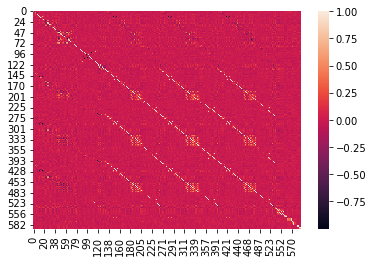

In [30]:
sns.heatmap(corr_matrix)

<AxesSubplot:>

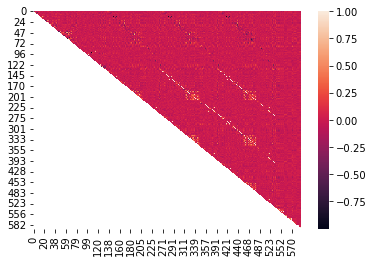

In [31]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
sns.heatmap(upper)

In [32]:
upper.head(20)

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
0,NaN,-0.174254,-0.004933,0.000871,-0.003782,-0.015269,0.002752,-0.066828,0.024701,-0.008397,0.065179,-0.000054,0.006828,-0.007177,-0.034343,0.043736,0.008633,-0.027135,0.024516,0.010032,0.001900,-0.047904,-0.022133,0.070766,0.055095,0.091101,0.040223,-0.040198,-0.042307,-0.027299,0.056066,-0.018182,0.039357,-0.037643,-0.039353,-0.038540,-0.031190,-0.056404,0.039747,-0.011484,-0.038381,0.056423,-0.015804,-0.028857,-0.027795,0.014282,-0.036898,-0.068498,-0.023963,0.011434,-0.027557,-0.003773,-0.030167,-0.013211,-0.074513,-0.027073,0.023119,-0.001130,-0.044893,-0.019305,-0.023269,-0.009466,-0.000528,0.040881,-0.011222,-0.024027,-0.002045,-0.016680,0.061513,0.021058,0.003397,0.055788,-0.100766,-0.016721,0.036341,0.039646,-0.010677,0.043705,-0.023369,0.014540,-0.034366,0.048896,-0.003109,0.019739,-0.006845,-0.010303,0.014877,-0.049546,-0.002423,-0.021163,-0.025367,0.059747,-0.022333,-0.054965,-0.078972,0.023286,0.004550,0.008228,-0.018723,-0.032654,-0.023985,-0.002403,0.024376,0.001793,0.043743,0.008008,-0.036906,-0.042784,0.017883,0.000703,0.016662,-0.008373,-0.017618,0.059767,-0.018446,0.007839,-0.023243,-0.064164,0.017075,-0.005099,0.027480,-0.003866,0.012588,-0.026684,0.166904,0.160508,-0.025013,0.005922,-0.034396,-0.014471,-0.021846,0.011390,-0.013585,-0.018779,-0.074336,-0.024916,0.010536,-0.019936,-0.023562,-0.049745,-0.024052,-0.060054,0.015988,0.023327,0.020086,-0.007982,0.071525,0.015302,0.023588,0.009754,0.007251,0.045459,0.023791,0.050874,-0.014185,0.007999,0.011777,0.036001,0.011786,0.016102,-0.009920,0.001579,0.001511,0.013255,-0.000152,-0.017746,0.013718,0.011766,0.002082,-0.052489,0.020065,-0.012295,-0.014828,-0.037142,-0.014970,-0.012831,-0.003858,-0.023380,-0.004540,-0.017405,-0.024501,0.008713,-0.029653,-0.034583,-0.006425,-0.059784,-0.044332,-0.057815,0.008381,-0.009390,0.052310,-0.030191,-0.005336,-0.056148,0.015802,-0.013286,-0.016532,-0.009165,-0.014327,-0.038339,-0.024637,-0.028979,-0.000869,-0.022258,0.007819,0.024322,0.008066,-0.046765,-0.003566,-0.008881,0.010153,-0.068380,0.073893,-0.011021,0.030055,-0.024980,0.171107,0.147988,-0.010692,0.011004,-0.036307,-0.011101,-0.024328,0.015307,-0.008095,-0.017618,-0.073954,-0.016307,0.005380,-0.021305,-0.026004,-0.051387,-0.016957,-0.063954,0.028046,0.024647,0.011238,-0.006625,0.071010,0.016241,0.020704

In [33]:
neg_correlated=[col for col in upper.columns if any(upper[col]<=-0.9)]
pos_correlated=[col for col in upper.columns if any(upper[col]>=+0.9)]

In [34]:
total_correlated=neg_correlated+pos_correlated
len(total_correlated)

196

In [35]:
# Dropping the high correlated columns
x_scaled=x_scaled.drop(total_correlated,axis=1)
x_scaled.shape

(1577, 256)

In [36]:
# VIF Approach
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
x=sm.add_constant(x_scaled)
vif1=pd.DataFrame()
vif1["Variable"]=x.columns
vif1["VIF"]=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
vif1

,Variable,VIF
0,const,1.301216e+06
1,0,1.334191e+00
2,1,1.270338e+00
3,2,1.684335e+00
4,3,8.230649e+00
...,...,...
252,583,6.131688e+01
253,584,6.150012e+01
254,586,2.065324e+00
255,587,1.899356e+00


In [37]:
high_vif1=vif1[vif1['VIF']>10]
high_vif1.shape

(71, 2)

In [38]:
high_vif1.index

Int64Index([  0,   5,  13,  15,  23,  24,  25,  28,  29,  32,  39,  41,  42,
             43,  44,  45,  46,  47,  48,  50,  51,  54,  55,  56,  57,  58,
             59,  60,  62,  63,  82,  84,  96, 100, 102, 115, 116, 117, 123,
            124, 126, 134, 135, 151, 153, 154, 156, 157, 159, 160, 161, 162,
            163, 164, 165, 167, 191, 198, 200, 201, 202, 205, 208, 212, 213,
            216, 217, 218, 237, 252, 253],
           dtype='int64')

In [39]:
x1=x.drop(high_vif1["Variable"],axis=1)
x1.shape

(1577, 186)

In [40]:
x1.head()

,0,1,2,3,6,7,8,9,10,11,12,15,17,19,20,21,22,23,24,28,29,32,33,35,37,38,39,40,41,44,55,58,59,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,95,99,100,102,103,107,108,112,113,114,115,116,118,119,120,122,125,126,128,129,130,131,132,133,134,135,136,137,142,143,144,145,146,151,155,156,159,160,161,162,163,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,185,195,198,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,247,248,250,251,253,254,255,267,268,269,316,367,368,418,419,432,433,439,468,472,482,483,484,485,486,487,488,489,499,500,510,511,542,543,544,546,547,548,550,551,555,558,559,562,563,564,565,570,571,572,573,582,586,587,589
0,0.376148,0.291207,0.534140,0.286993,0.419322,0.906716,0.565965,0.375682,0.393629,0.910747,0.179374,0.142305,0.968426,0.832675,0.802338,0.110171,0.834530,0.507561,0.563973,0.345946,0.871080,0.101468,0.067558,0.017485,0.387589,0.594883,0.287964,0.154878,0.130201,0.404846,0.807407,0.836839,0.282867,0.233454,0.150713,0.557060,0.412284,0.527118,0.724225,0.834922,0.363985,0.644980,0.375770,0.737160,0.551757,0.987191,0.428383,0.067798,0.344100,0.367097,0.366093,0.549342,0.666667,0.357926,0.566038,0.643663,0.505639,0.414997,0.349161,0.931423,0.762408,0.0,0.511563,0.983398,0.710608,0.944915,0.677768,0.371407,0.281215,0.254997,0.915276,0.712089,0.588474,0.114173,0.530583,0.761944,0.104376,0.083333,0.338082,0.418700,0.027939,0.355372,0.033901,0.255560,0.177176,0.008894,0.024662,0.011322,0.018611,0.134772,0.020768,0.004258,0.129572,0.113300,0.01875,0.033237,0.103102,0.746813,0.253762,0.380748,0.332678,0.561233,0.334603,0.094975,0.138019,0.089368,0.075439,0.176100,0.016468,0.031736,0.019543,0.592263,0.191950,0.249298,0.109370,0.073125,0.116815,0.263501,0.158184,0.132183,0.474657,0.166667,0.072684,0.000303,0.018010,0.040440,0.376431,0.166329,0.058709,0.121212,0.126126,0.220798,0.017831,0.115159,0.000909,0.040470,0.033766,0.285875,0.363043,0.061824,0.116527,0.158504,0.100840,0.215569,0.000000,0.000000,0.021313,0.010510,0.017096,0.033656,0.244122,0.230419,0.196503,0.000000,0.294177,0.183862,0.126301,0.128639,0.563144,0.000000,0.000000,0.152304,0.000000,0.328244,0.142857,0.322581,0.047139,0.473499,0.738527,0.185956,0.055621,0.145775,0.185263,0.260211,0.332909,0.324580,0.134451,0.047840,0.800072,0.746490,0.007249,0.024460,0.771875,0.307435,0.110821,0.079433
1,0.504934,0.533060,0.493336,0.293062,0.454832,0.907463,0.640524,0.410756,0.296928,0.924712,0.229333,0.160697,0.973360,0.845783,0.735842,0.120276,0.829470,0.487034,0.563878,0.586184,0.691394,0.072927,0.065284,0.017557,0.345606,0.559996,0.266956,0.907777,0.065442,0.189113,0.585185,0.857553,0.130558,0.222610,0.222949,0.646035,0.480438,0.528959,0.375079,0.669844,0.413155,0.678912,0.434259,0.622356,0.586901,0.971638,0.489780,0.066108,0.523371,0.431569,0.299754,0.615132,0.611111,0.432907,0.566038,0.651824,0.537594,0.437116,0.247971,0.947390,0.742880,0.0,0.653663,0.983398,0.654995,0.910311,0.451734,0.396895,0.329246,0.245306,0.808472,0.621068,0.766489,0.098425,0.566856,0.713899,0.147515,0.042735,0.147093,0.207924,0.041515,0.429752,0.354360,0.137375,0.115897,0.018805,0.021480,0.012919,0.025414,0.169065,0.034947,0.001383,0.096134,0.088670,0.04375,0.083815,0.074818,0.790317,0.250670,0.482726,0.419492,0.520974,0.590588,0.179459,0.132671,0.044253,0.079298,0.296277,0.015641,0.034258,0.065277,0.525570,0.154592,0.102028,0.042419,0.064063,0.073835,0.233234,0.271695,0.085071,0.621358,0.108974,0.113064,0.001312,0.051559,0.030908,0.387531,0.118999,0.072780,0.207792,0.099099,0.055759,0.016904,0.094454,0.000404,0.060592,0.218182,0.118207,0.462319,0.087257,0.077425,0.197185,0.109244,0.140719,0.000000,0.556860,0.033576,0.003420,0.050690,0.114444,0.276736,0.357102,0.184184,0.336134,0.267756,0.000000,0.265191,0.251258,0.222822,0.000000,0.000000,0.316046,0.320000,0.328244,0.142857,0.322581,0.079735,0.623315,0.197603,0.135950,0.028008,0.198159,0.182683,0.506575,0.284586,0.469061,0.282506,0.104079,0.785253,0.727392,0.009428,0.099531,0.703125,0.33

In [45]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [46]:
from sklearn.feature_selection import SelectFromModel

In [407]:
# Random Forest

In [51]:
RF=RandomForestClassifier(n_jobs=-1,random_state=100)
sfm=SelectFromModel(RF)
sfm.fit(x1,y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=100))

In [52]:
print("significant benchamrk",np.mean(sfm.estimator_.feature_importances_))

significant benchamrk 0.005376344086021506


In [54]:
sfm.get_support()

array([ True, False,  True, False, False, False, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False, False, False,  True, False, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True, False, False,
        True, False,

In [56]:
feature_selected_rfm=x1.columns[sfm.get_support()]
feature_selected_rfm

Index(['0', '2', '9', '10', '11', '12', '17', '21', '22', '32', '38', '40',
       '41', '44', '55', '59', '71', '75', '76', '77', '81', '82', '83', '88',
       '89', '93', '99', '102', '103', '107', '118', '119', '120', '129',
       '132', '134', '144', '156', '160', '166', '168', '180', '183', '208',
       '210', '211', '212', '214', '215', '217', '218', '221', '222', '225',
       '247', '248', '267', '269', '316', '433', '472', '485', '510', '511',
       '550', '551', '558', '559', '562', '571', '573', '582', '587'],
      dtype='object')

In [57]:
len(feature_selected_rfm)

73

In [ ]:
# Adaboost

In [59]:
ADB=AdaBoostClassifier(random_state=100)

In [60]:
sfm_1=SelectFromModel(ADB)
sfm_1.fit(x1,y)

SelectFromModel(estimator=AdaBoostClassifier(random_state=100))

In [61]:
print("Significant benchmark for ADB",np.mean(sfm_1.estimator_.feature_importances_))

Significant benchmark for ADB 0.005376344086021506


In [63]:
sfm_1.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [65]:
feature_selected_ADB=x1.columns[sfm_1.get_support()]
feature_selected_ADB

Index(['0', '2', '15', '19', '20', '21', '33', '35', '58', '59', '71', '75',
       '76', '90', '102', '103', '113', '116', '119', '129', '130', '131',
       '133', '143', '145', '156', '162', '175', '180', '183', '198', '216',
       '247', '250', '433', '484', '485', '488', '500', '510', '511', '547',
       '571', '587'],
      dtype='object')

In [66]:
len(feature_selected_ADB)

44

In [99]:
x1_rf=x1[feature_selected_rfm]
x1_rf.shape

(1577, 73)

In [100]:
x1_adb=x1[feature_selected_ADB]
x1_adb.shape

(1577, 44)

In [ ]:
# Modelling

In [104]:
from sklearn.model_selection import train_test_split
x_train_rf,x_test_rf,y_train_rf,y_test_rf=train_test_split(x1_rf,y,test_size=0.2,stratify=y,random_state=101)

In [115]:
x_train_adb,x_test_adb,y_train_adb,y_test_adb=train_test_split(x1_adb,y,test_size=0.2,stratify=y,random_state=101)

In [107]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=101)
rfc.fit(x_train_rf,y_train_rf)
y_pred_rf=rfc.predict(x_test_rf)


In [106]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

In [109]:
print(confusion_matrix(y_test_rf,y_pred_rf))
print(classification_report(y_test_rf,y_pred_rf))

[[295   0]
 [ 20   1]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       295
           1       1.00      0.05      0.09        21

    accuracy                           0.94       316
   macro avg       0.97      0.52      0.53       316
weighted avg       0.94      0.94      0.91       316



In [ ]:
# using SFM data of adabooster method 

In [116]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=101)
rfc.fit(x_train_adb,y_train_adb)
y_pred_adb=rfc.predict(x_test_adb)

In [117]:
print(confusion_matrix(y_test_adb,y_pred_adb))
print(classification_report(y_test_adb,y_pred_adb))

[[295   0]
 [ 20   1]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       295
           1       1.00      0.05      0.09        21

    accuracy                           0.94       316
   macro avg       0.97      0.52      0.53       316
weighted avg       0.94      0.94      0.91       316



In [ ]:
# using SFM data of Random Calssifier method 

In [124]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(x_train_rf,y_train_rf)
y_pred_GNB=GNB.predict(x_test_rf)

In [126]:
print(confusion_matrix(y_test_rf,y_pred_GNB))
print(classification_report(y_test_rf,y_pred_GNB))


[[259  36]
 [ 13   8]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       295
           1       0.18      0.38      0.25        21

    accuracy                           0.84       316
   macro avg       0.57      0.63      0.58       316
weighted avg       0.90      0.84      0.87       316



In [ ]:
# using SFM data of adabooster method 

In [130]:
GNB=GaussianNB()
GNB.fit(x_train_adb,y_train_adb)
y_pred_adb_1=GNB.predict(x_test_adb)

In [131]:
print(confusion_matrix(y_test_adb,y_pred_adb_1))
print(classification_report(y_test_adb,y_pred_adb_1))

[[246  49]
 [ 11  10]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       295
           1       0.17      0.48      0.25        21

    accuracy                           0.81       316
   macro avg       0.56      0.66      0.57       316
weighted avg       0.90      0.81      0.85       316



In [ ]:
# using SFM data of adabooster method 

In [132]:
BG=BaggingClassifier(GNB)
BG.fit(x_train_rf,y_train_rf)
y_pred_BG=BG.predict(x_test_rf)

In [133]:
print(confusion_matrix(y_test_rf,y_pred_BG))
print(classification_report(y_test_rf,y_pred_BG))

[[261  34]
 [ 15   6]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       295
           1       0.15      0.29      0.20        21

    accuracy                           0.84       316
   macro avg       0.55      0.59      0.56       316
weighted avg       0.89      0.84      0.87       316



In [ ]:
# using SFM data of adabooster method 

In [136]:
BG.fit(x_train_adb,y_train_adb)
y_pred_BG_adb=BG.predict(x_test_adb)

In [137]:
print(confusion_matrix(y_test_adb,y_pred_BG_adb))
print(classification_report(y_test_adb,y_pred_BG_adb))

[[248  47]
 [ 12   9]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       295
           1       0.16      0.43      0.23        21

    accuracy                           0.81       316
   macro avg       0.56      0.63      0.56       316
weighted avg       0.90      0.81      0.85       316



In [153]:
dt=DecisionTreeClassifier()
dt.fit(x_train_rf,y_train_rf)
y_pred_dt_rf=dt.predict(x_test_rf)
print(confusion_matrix(y_test_rf,y_pred_dt_rf))
print(classification_report(y_test_rf,y_pred_dt_rf))

[[277  18]
 [ 18   3]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       295
           1       0.14      0.14      0.14        21

    accuracy                           0.89       316
   macro avg       0.54      0.54      0.54       316
weighted avg       0.89      0.89      0.89       316



In [219]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train_rf,y_train_rf)
y_pred_dt_rf=dt1.predict(x_test_rf)
print(confusion_matrix(y_test_rf,y_pred_dt_rf))
print(classification_report(y_test_rf,y_pred_dt_rf))

[[274  21]
 [ 18   3]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       295
           1       0.12      0.14      0.13        21

    accuracy                           0.88       316
   macro avg       0.53      0.54      0.53       316
weighted avg       0.88      0.88      0.88       316



In [155]:
dt=DecisionTreeClassifier()
dt.fit(x_train_adb,y_train_adb)
y_pred_dt_adb=dt.predict(x_test_adb)
print(confusion_matrix(y_test_adb,y_pred_dt_adb))
print(classification_report(y_test_adb,y_pred_dt_adb))

[[277  18]
 [ 17   4]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       295
           1       0.18      0.19      0.19        21

    accuracy                           0.89       316
   macro avg       0.56      0.56      0.56       316
weighted avg       0.89      0.89      0.89       316



In [241]:
dt=DecisionTreeClassifier(criterion='entropy',min_samples_split=2)
dt.fit(x_train_adb,y_train_adb)
y_pred_dt_adb=dt.predict(x_test_adb)
print(confusion_matrix(y_test_adb,y_pred_dt_adb))
print(classification_report(y_test_adb,y_pred_dt_adb))

[[284  11]
 [ 18   3]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       295
           1       0.21      0.14      0.17        21

    accuracy                           0.91       316
   macro avg       0.58      0.55      0.56       316
weighted avg       0.89      0.91      0.90       316



In [242]:
ADB=AdaBoostClassifier()
ADB.fit(x_train_adb,y_train_adb)
y_pred_adb_adb=ADB.predict(x_test_adb)
print(confusion_matrix(y_test_adb,y_pred_adb_adb))
print(classification_report(y_test_adb,y_pred_adb_adb))

[[286   9]
 [ 20   1]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       295
           1       0.10      0.05      0.06        21

    accuracy                           0.91       316
   macro avg       0.52      0.51      0.51       316
weighted avg       0.88      0.91      0.89       316



In [243]:
ADB=AdaBoostClassifier()
ADB.fit(x_train_rf,y_train_rf)
y_pred_adb_rf=ADB.predict(x_test_rf)
print(confusion_matrix(y_test_rf,y_pred_adb_rf))
print(classification_report(y_test_rf,y_pred_adb_rf))

[[285  10]
 [ 19   2]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       295
           1       0.17      0.10      0.12        21

    accuracy                           0.91       316
   macro avg       0.55      0.53      0.54       316
weighted avg       0.89      0.91      0.90       316



In [244]:
AD=AdaBoostClassifier(GNB)
AD.fit(x_train_rf,y_train_rf)
y_pred_ad_rf=AD.predict(x_test_rf)
print(confusion_matrix(y_test_rf,y_pred_ad_rf))
print(classification_report(y_test_rf,y_pred_ad_rf))

[[274  21]
 [ 21   0]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       295
           1       0.00      0.00      0.00        21

    accuracy                           0.87       316
   macro avg       0.46      0.46      0.46       316
weighted avg       0.87      0.87      0.87       316



In [167]:
#balancing the data

In [178]:
from imblearn.over_sampling import SMOTE,BorderlineSMOTE

In [179]:
SM=SMOTE()

In [211]:
x_res_rf,y_res_rf=SM.fit_resample(x_train_rf,y_train_rf)
y_res_rf.shape

(2354,)

In [212]:
x_train_adb.shape

(1261, 44)

In [214]:
y_train_adb.value_counts()

0    1177
1      84
Name: Pass/Fail, dtype: int64

In [215]:
x_res_adb,y_res_adb=SM.fit_resample(x_train_adb,y_train_adb)


In [216]:
y_res_adb.value_counts()

0    1177
1    1177
Name: Pass/Fail, dtype: int64

In [225]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier

In [230]:
BG_dt=BaggingClassifier(dt)

In [217]:
# USing Balanced data

In [231]:
for model in [rfc,BG,BG_dt,GNB,dt]:
    print("*"*50)
    print("Performance of Model",model)
    print("*"*50)
    
    abc=model.fit(x_res_rf,y_res_rf)
    y_pred_rfc=abc.predict(x_test_rf)
    CM=confusion_matrix(y_test_rf,y_pred_rfc)
    CR=classification_report(y_test_rf,y_pred_rfc)
    print()
    
    print("Confusion Marix \n",CM)
    print("*"*50)
    print("Classification Report \n",CR)
    print("*"*80)
    print()

**************************************************
Performance of Model RandomForestClassifier(n_jobs=-1, random_state=101)
**************************************************

Confusion Marix 
 [[291   4]
 [ 20   1]]
**************************************************
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       295
           1       0.20      0.05      0.08        21

    accuracy                           0.92       316
   macro avg       0.57      0.52      0.52       316
weighted avg       0.89      0.92      0.90       316

********************************************************************************

**************************************************
Performance of Model BaggingClassifier(base_estimator=GaussianNB())
**************************************************

Confusion Marix 
 [[204  91]
 [ 13   8]]
**************************************************
Classification Report 
             

In [232]:
for model in [rfc,BG,BG_dt,GNB,dt]:
    print("*"*50)
    print("Performance of Model",model)
    print("*"*50)

    abc=model.fit(x_res_adb,y_res_adb)
    y_pred_adb=abc.predict(x_test_adb)
    CM=confusion_matrix(y_test_adb,y_pred_adb)
    CR=classification_report(y_test_adb,y_pred_adb)
    print()
    
    print("Confusion Marix \n",CM)
    print("*"*50)
    print("Classification Report \n",CR)
    print("*"*80)
    print()

**************************************************
Performance of Model RandomForestClassifier(n_jobs=-1, random_state=101)
**************************************************

Confusion Marix 
 [[289   6]
 [ 19   2]]
**************************************************
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       295
           1       0.25      0.10      0.14        21

    accuracy                           0.92       316
   macro avg       0.59      0.54      0.55       316
weighted avg       0.89      0.92      0.90       316

********************************************************************************

**************************************************
Performance of Model BaggingClassifier(base_estimator=GaussianNB())
**************************************************

Confusion Marix 
 [[196  99]
 [  7  14]]
**************************************************
Classification Report 
             

In [ ]:
# In combining algorithm, Bagging Classifier with GNB is giving good result

# Optimization of model

In [250]:

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [316]:
bg1=BaggingClassifier(GNB)

In [317]:
bg1.get_params()

{'base_estimator__priors': None,
 'base_estimator__var_smoothing': 1e-09,
 'base_estimator': GaussianNB(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [400]:
param={'n_estimators': np.arange(10, 180,10)}

In [401]:
RFM=RandomizedSearchCV(bg1,param,cv=10,n_jobs=-1,random_state=42,n_iter=100)

In [402]:
RFM.fit(x_res_adb,y_res_adb)

RandomizedSearchCV(cv=10,
                   estimator=BaggingClassifier(base_estimator=GaussianNB()),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170])},
                   random_state=42)

In [403]:
print(RFM.best_estimator_)
print(RFM.best_score_)
print(RFM.best_params_)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=120)
0.7846249549224666
{'n_estimators': 120}


In [404]:
bg2=BaggingClassifier(base_estimator=GNB,n_estimators=120,n_jobs=-1,random_state=42)


In [394]:
abc=bg2.fit(x_res_adb,y_res_adb)
y_pred_adb=abc.predict(x_test_adb)
CM=confusion_matrix(y_test_adb,y_pred_adb)
CR=classification_report(y_test_adb,y_pred_adb)
print()
    
print("Confusion Marix \n",CM)
print("*"*80)
print("Classification Report \n",CR)
print("*"*80)
print()


Confusion Marix 
 [[196  99]
 [  6  15]]
********************************************************************************
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.66      0.79       295
           1       0.13      0.71      0.22        21

    accuracy                           0.67       316
   macro avg       0.55      0.69      0.51       316
weighted avg       0.91      0.67      0.75       316

********************************************************************************



#cocnclusion:
* Bagging classifier with gnb is the best algorithm
* Balanced data works fine compare to unbalanced data
* optimization doesnt impacted much 
